In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)
import requests
import time


In [3]:
import time

url = 'https://fbref.com/en/squads/'
year = '/2022-2023'

teams = {
    'Man-United': '19538871',
    'Man-City': 'b8fd03ef',
    'Arsenal': '18bb7c10',
    'Newcastle': 'b2b47a98',
    'Liverpool': '822bd0ba',
    'Tottenham': '361ca564',
    'Chelsea': 'cff3d9bb',
    'Leicester-City': 'a2d435b3',
    'Wolves': '8cec06e1',
    'Sheffield-United': '1df6b87e',
    'Burnley': '943e8050',
    'Southampton': '33c895d4',
    'Everton': 'd3fd31cc',
    'Crystal-Palace': '47c64c55',
    'Brighton': 'd07537b9',
    'West-Ham': '7c21e445',
    'Aston-Villa': '8602292d'
}

df = pd.DataFrame()

for team in teams:
    # Send a request with the fake User-Agent
    response = requests.get(url + teams[team] + year)
    
    try:
        # Read HTML file and extract tables
        tables = pd.read_html(response.content)
        
        # Assuming you want the first table, you can access it like this
        if tables:
            table_df = tables[1]
            table_df['Team'] = team
            df = pd.concat([df, table_df], ignore_index=True)
        else:
            print("No tables found in the HTML file.")

        time.sleep(5)
    except Exception as e:
        print(f"Error: {e}")



/tmp/ipykernel_50008/2023176794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['GF'] = pd.to_numeric(df_clean['GF'], errors='coerce')


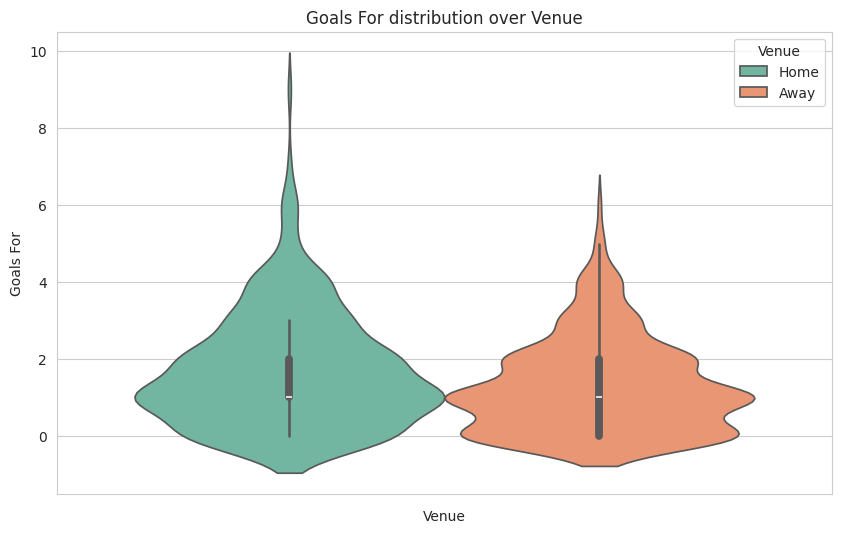

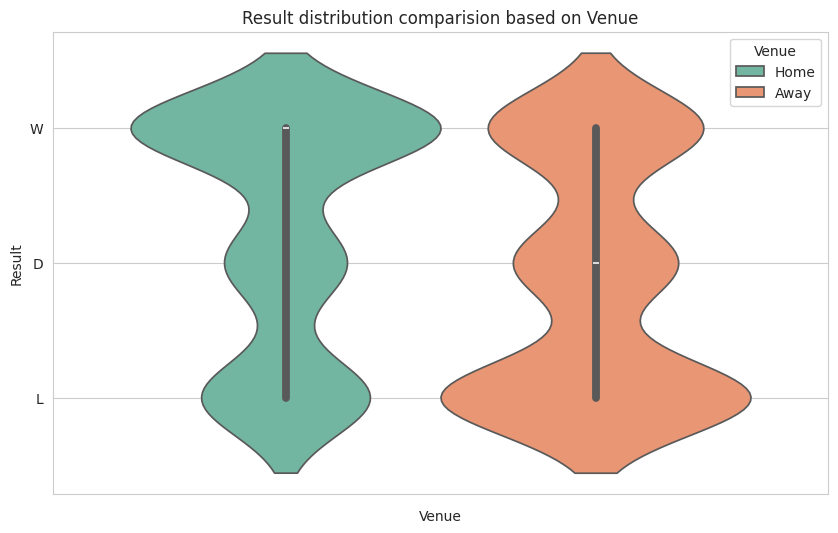

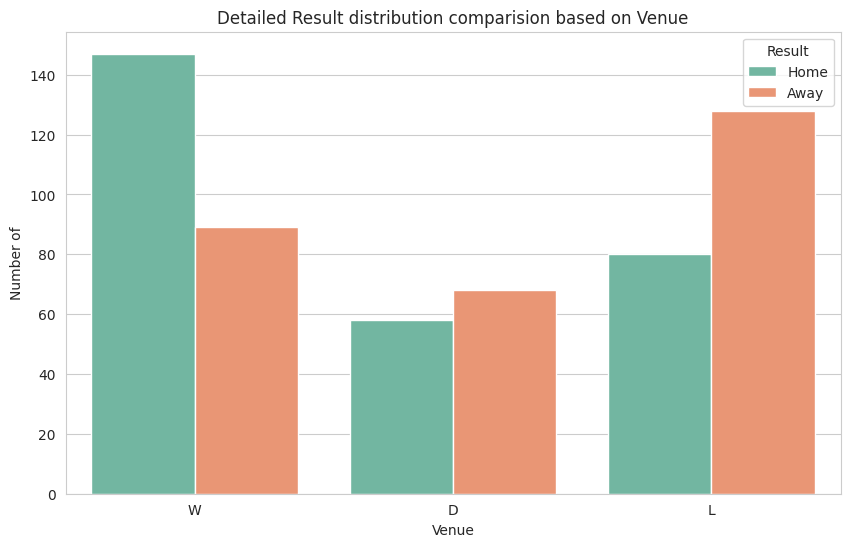

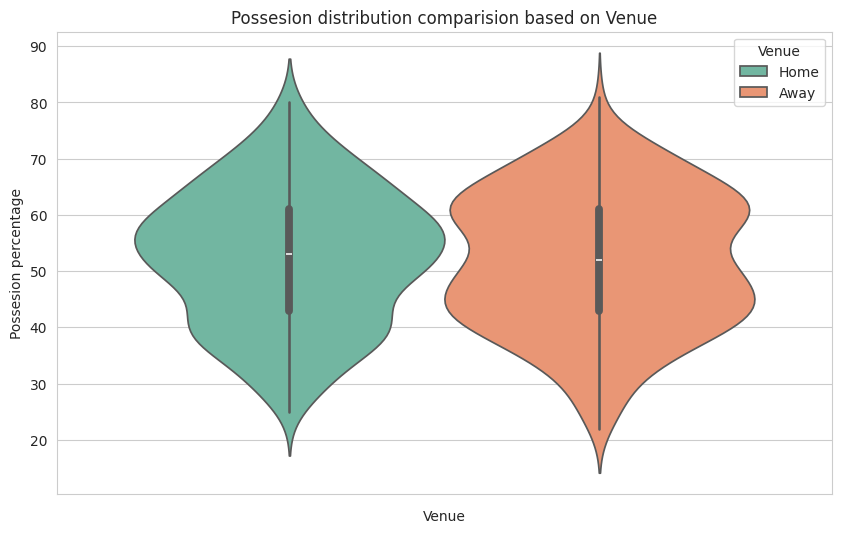

In [4]:
df_clean = df[df['Comp'] == 'Premier League']

df_clean['GF'] = pd.to_numeric(df_clean['GF'], errors='coerce')

df_clean = df_clean.sort_values(by='GF', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.violinplot(hue='Venue', y='GF', data=df_clean, palette='Set2', legend=True)
plt.title('Goals For distribution over Venue')
plt.xlabel('Venue')
plt.ylabel('Goals For')
plt.legend(title = "Venue")
plt.show()

plt.figure(figsize=(10, 6))

sns.violinplot(hue='Venue', y='Result', data=df_clean, palette='Set2', legend=True)
plt.title('Result distribution comparision based on Venue')
plt.xlabel('Venue')
plt.ylabel('Result')
plt.legend(title = "Venue")
plt.show()

plt.figure(figsize=(10, 6))

sns.countplot(x='Result', hue='Venue', data=df_clean, palette='Set2')
plt.title('Detailed Result distribution comparision based on Venue')
plt.xlabel('Venue')
plt.ylabel('Number of')
plt.legend(title = "Result")
# Show the plot
plt.show()

plt.figure(figsize=(10, 6))

sns.violinplot(hue='Venue', y='Poss', data=df_clean, palette='Set2', legend=True)
plt.title('Possesion distribution comparision based on Venue')
plt.xlabel('Venue')
plt.ylabel('Possesion percentage')
plt.legend(title = "Venue")
plt.show()

,Team,GF_sum,GF_mean,Attendance_sum,Attendance_mean,Poss_sum,Poss_mean
14,Wolves,31,0.815789,1369309.0,36034.447368,1898.0,49.947368
5,Everton,34,0.894737,1511997.0,39789.394737,1625.0,42.763158
11,Southampton,36,0.947368,1350982.0,35552.157895,1692.0,44.526316
3,Chelsea,38,1.000000,1527522.0,40197.947368,2229.0,58.657895
4,Crystal-Palace,40,1.052632,1249898.0,32892.052632,1761.0,46.342105
13,West-Ham,42,1.105263,1928639.0,50753.657895,1600.0,42.105263
1,Aston-Villa,51,1.342105,1511156.0,40842.054054,1872.0,49.263158
6,Leicester-City,51,1.342105,1378998.0,36289.421053,1813.0,47.710526
9,Man-United,58,1.526316,2131591.0,56094.500000,2041.0,53.710526
10,Newcastle,68,1.789474,1744398.0,45905.210526,1986.0,52.263158


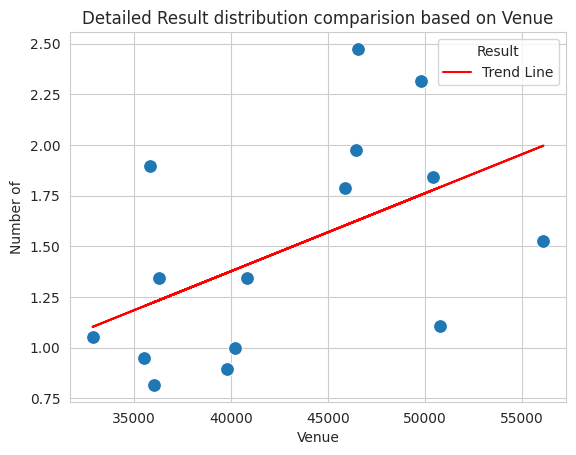

In [38]:
df_man = df_clean[df_clean['Team'] == 'Man-United']
df_bri = df_clean[df_clean['Team'] == 'Brighton']
df_wol = df_clean[df_clean['Team'] == 'Wolves']

season_df = pd.DataFrame()
for team in teams:
    team_df = df_clean[df_clean['Team'] == team]
    season_df['Team'] = team
    season_df['Goals'] = team_df['GF'].sum()
    season_df['AVG_Attendance'] = team_df['Attendance'].mean()


grouped_df = df_clean.groupby('Team').agg({'GF': ['sum', 'mean'], 'Attendance': ['sum', 'mean'], 'Poss': ['sum', 'mean']})
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['Team', 'GF_sum', 'GF_mean', 'Attendance_sum', 'Attendance_mean', 'Poss_sum', 'Poss_mean']
grouped_df = grouped_df.sort_values(by='GF_sum')

display(grouped_df)


sns.scatterplot(x='Attendance_mean', y='GF_mean', data=grouped_df, s=100)

slope, intercept = np.polyfit(grouped_df['Attendance_mean'], grouped_df['GF_mean'], 1)
plt.plot(grouped_df['Attendance_mean'], slope * grouped_df['Attendance_mean'] + intercept, color='red', label='Trend Line')



plt.title('Detailed Result distribution comparision based on Venue')
plt.xlabel('Venue')
plt.ylabel('Number of')
plt.legend(title = "Result")

# Show the plot
plt.show()